# Homework 2: U.S. Boundary Currents

Name: Harsita Keerthikanth

Date: 2/1/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

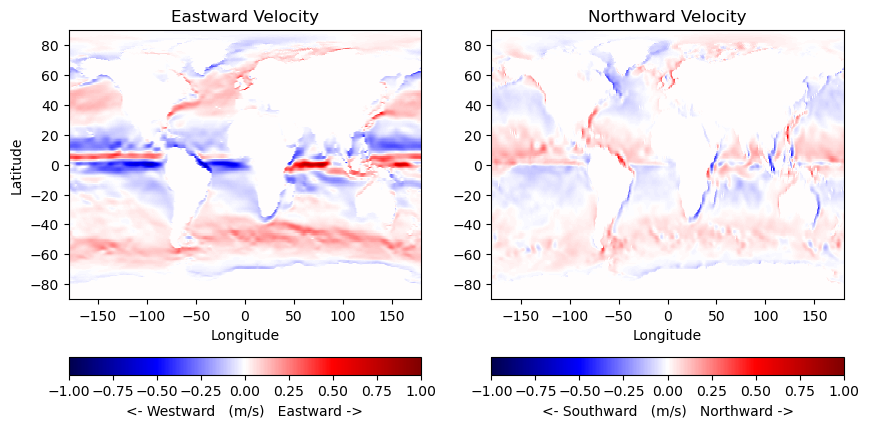

In [4]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='<- Westward   (m/s)   Eastward ->' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='<- Southward   (m/s)   Northward ->' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
3. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1. At 30 degrees N on the east coast of the US, the surface currents are moving northward and eastward. At 30 degrees N on the west coast, they are moving southward. At 45 degrees N on the east coast, they are moving northward and eastward. At 45 degrees N on the west coast, they are moving southward.
2. The current on the east coast flows faster than the current on the west coast.
3. These surface currents are part of gyres, which are large systems of rotating ocean currents driven by global wind patterns and the Earth's rotation. In the North Atlantic and North Pacific, these gyres play a crucial role in distributing heat and regulating climate. The North Atlantic Gyre moves warm water from the equator toward the northern latitudes, helping regulate temperatures in the North Atlantic and affecting weather patterns in Europe. The North Pacific Gyre carries cold water from the north, helping to cool the west coast and plays a role in regulating the Pacific climate. In both gyres, the flow of warm and cold water influences regional climates, marine ecosystems, and global weather patterns.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [5]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [6]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

Text(0.5, 0, 'Longitude')

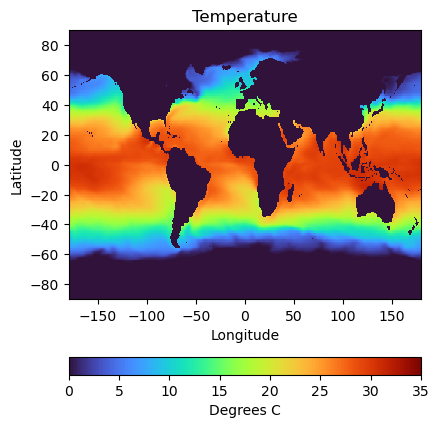

In [7]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(10,5))

# plot the data
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = 0, vmax=35, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='Degrees C' )
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperature on the west coast of the US is cooler than the temperature on the east coast at the same latitude.
2. The current on the west coast cools it by bringing in cold water from the north pacific. On the other hand, the current on the east coast warms it by bringing in warm water from the tropical gulf areas. 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [8]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvel = xr.open_dataset('WVELSTAR_2015_12.nc')

In [9]:
# store the WVELSTAR grid into a into numpy array
wvel = np.array(ds_wvel['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [10]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = np.array(ds_wvel['k_l'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0.5, 0, 'Longitude')

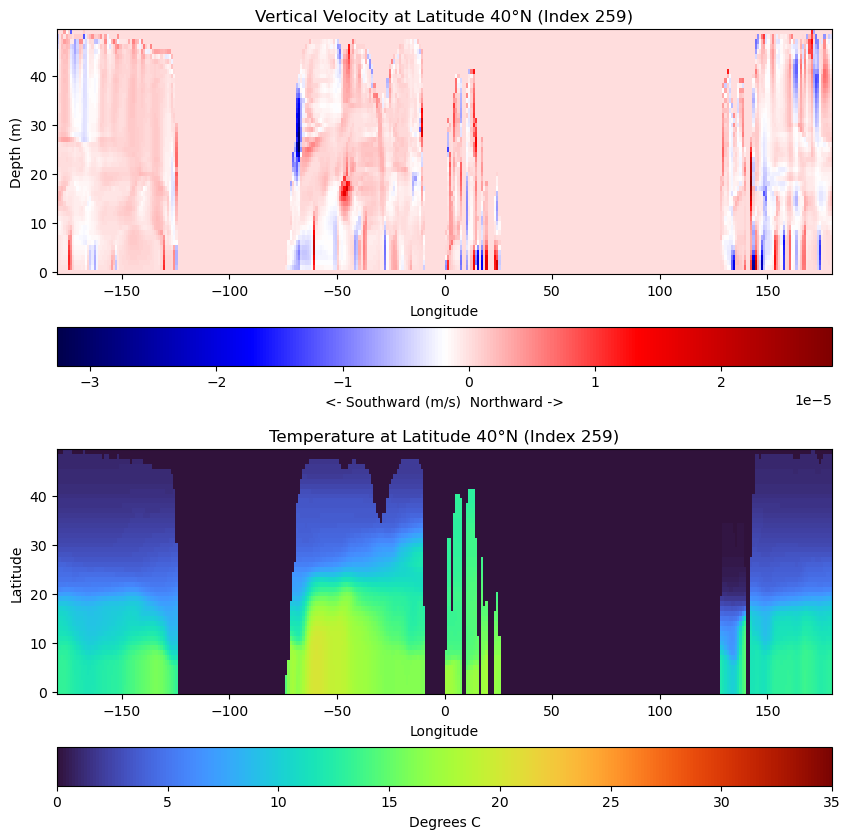

In [11]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
lat_index = 259
wvel_data = wvel[0, :, lat_index, :]
lat = ds_wvel.latitude.values 
lon = ds_wvel.longitude.values
plt.subplot(2,1,1)
C = plt.pcolormesh(lon, depth, wvel_data, vmin=-3.263e-5, vmax=2.876e-5, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label='<- Southward (m/s)  Northward ->')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')
plt.title(f'Vertical Velocity at Latitude 40°N (Index {lat_index})')

# make a subplot of the vertical profile of temperature
theta_data = theta[0, :, lat_index, :]
lat = ds_theta.latitude.values 
lon = ds_theta.longitude.values
plt.subplot(2,1,2)
C = plt.pcolormesh(lon,depth,theta_data, vmin = 0, vmax=35, cmap='turbo')
plt.colorbar(C, orientation='horizontal',label='Degrees C' )
plt.title(f'Temperature at Latitude 40°N (Index {lat_index})')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The vertical velocity in the current on the west coast is traveling northward while the vertical velocity on the east coast is traveling southward.
2. Vertical velocity is much slower than horizontal velocity. This is because horizontal velocity is influenced by wind patterns and the ocean while vertical velocity is slower because of weaker, localized factors.
3. Vertical currents on the west coast bring colder, deeper water to the surface, cooling the surface temperature, while on the east coast the current can bring warmer surface waters, raising temperatures.
4. The southward winds along the west coast in spring will pushing surface waters away from the shore and allow colder water to rise increasing vertical velocity and cooling the surface water.